In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")
    
sns.set(style="whitegrid")

m_range = [0,5,10,20,30,40,50,60,70,80,90,100]

In [2]:
def read_data (filename, skip_rows = 9, treshold = 6):

    df = pd.read_csv( filename, skiprows = skip_rows, names= m_range)
    df.drop( [70,80,90,100], axis = 1, inplace = True)
    
    for i in range(len(df[10]) ):
        if (df[10][i] == df[5][i]):
            df[20][i] = df[10][i]
    
    for m in [20,30,40,50,60]:
        for i in range( len(df[10])):
            if (df[m][i] == df[m-10][i] and m < 60):
                df[m+10][i] = df[m][i]                

    df.dropna(axis = 'index', thresh = treshold, inplace = True)
    df.index = np.arange( len(df[10]) )
    
    while len(df[10]) > 200:
        df.drop([ len(df[10])-1], axis = 0, inplace = True)
    
    if len(df[10]) < 200:
        print("WARNING! Less than 200 samples in file: {:}", filename)
        
    return df #df.astype(dtype = 'int32')

In [3]:
def histogram(df):

    f, axes = plt.subplots(1, 4, figsize=(15, 5))
    sns.despine(left=True)

    sns.distplot(df[30], color="r", axlabel = "range 30", bins = 15, label = 'range 30', ax=axes[0], kde = False)
    sns.distplot(df[40], color="m", axlabel = "range 40", bins = 15, label = 'range 40', ax=axes[1], kde = False)
    sns.distplot(df[50], color="b", axlabel = "range 50", bins = 15, label = 'range 50', ax=axes[2], kde = False)
    sns.distplot(df[60], color="g", axlabel = "range 60", bins = 15, label = 'range 60', ax=axes[3], kde = False)

    plt.tight_layout()

## X = 50

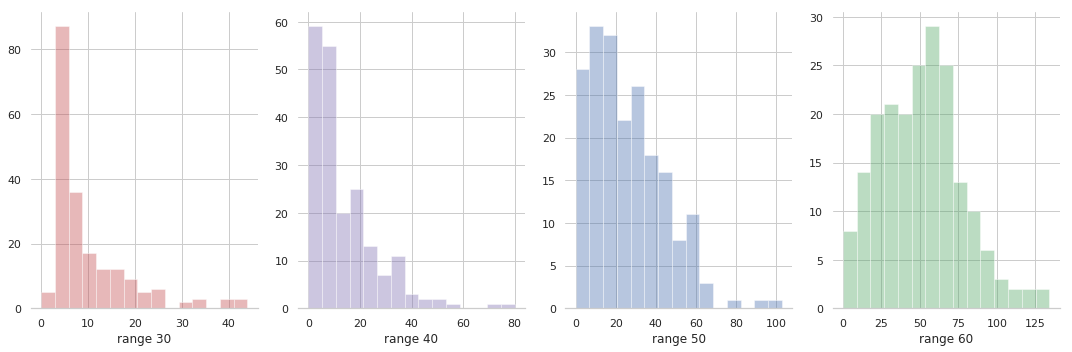

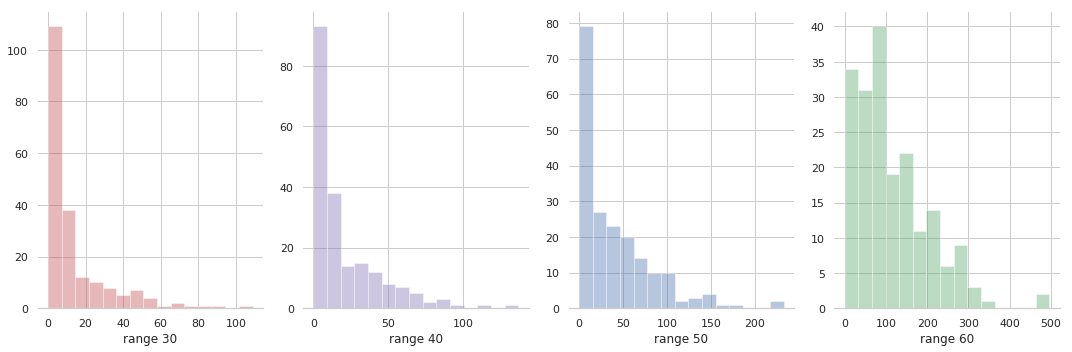

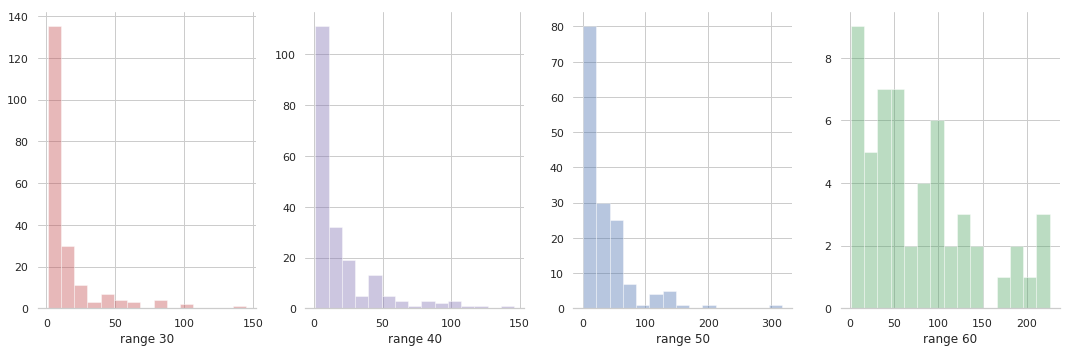

In [4]:
df_n100c10X50l03 = read_data('n100c10X50l03.csv') ;
df_n100c15X50l03 = read_data('n100c15X50l03.csv') ;
df_n100c20X50l03 = read_data('n100c20X50l03.csv') ;

histogram(df_n100c10X50l03)
histogram(df_n100c15X50l03)
histogram(df_n100c20X50l03)

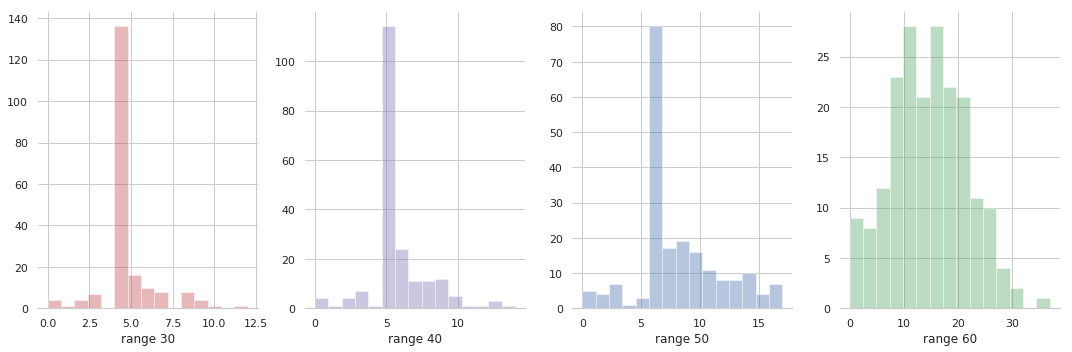

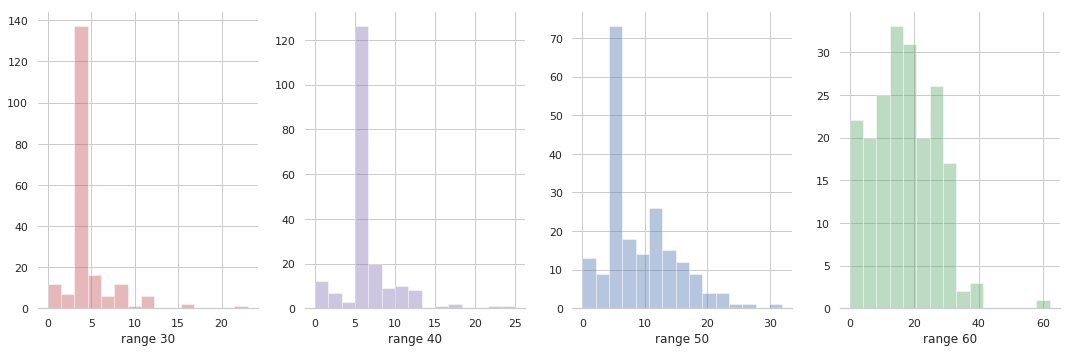

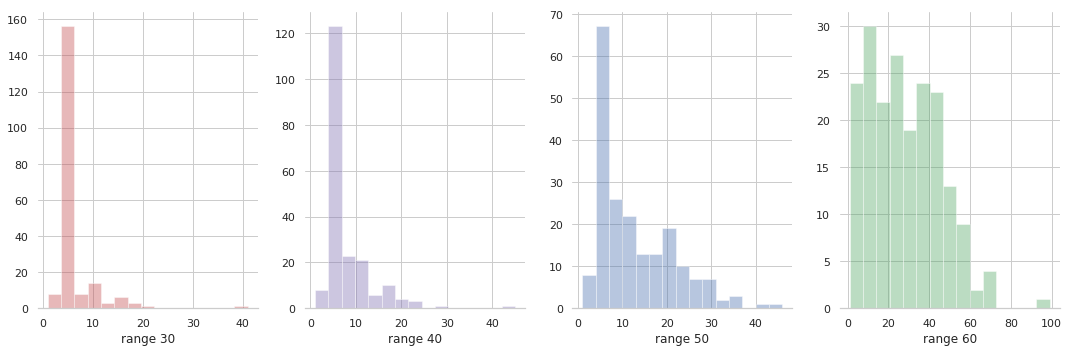

In [5]:
df_n100c10X50l1 = read_data('n100c10X50l1.csv') ;
df_n100c15X50l1 = read_data('n100c15X50l1.csv') ;
df_n100c20X50l1 = read_data('n100c20X50l1.csv') ;

histogram(df_n100c10X50l1)
histogram(df_n100c15X50l1)
histogram(df_n100c20X50l1)

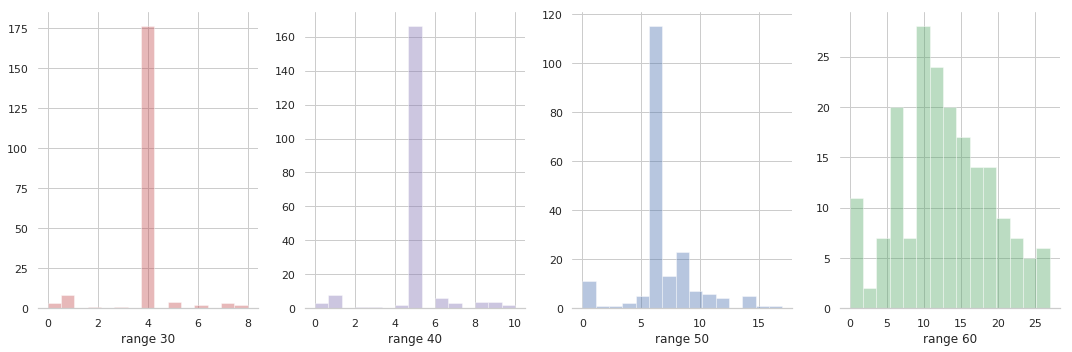

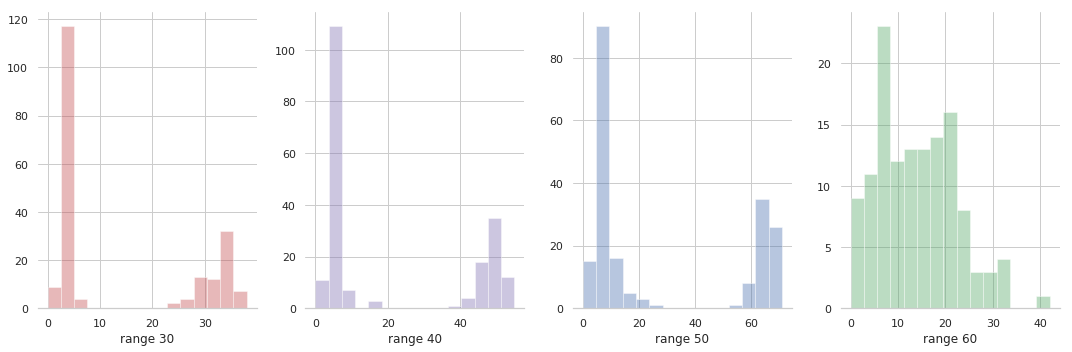

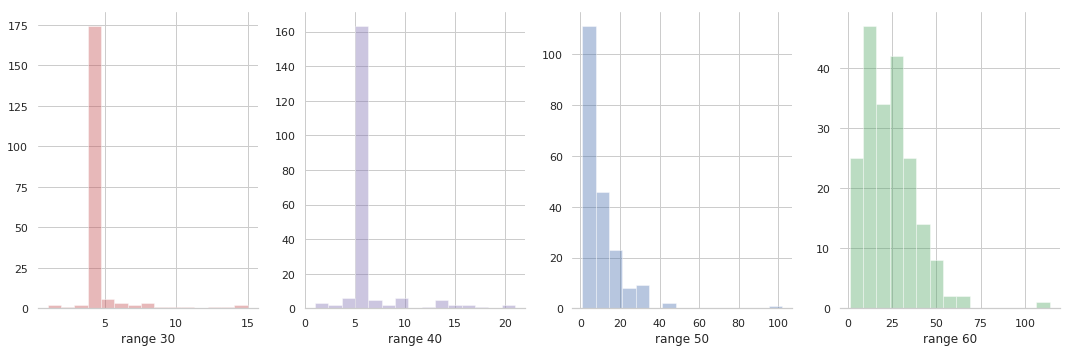

In [6]:
df_n100c10X100l1 = read_data('n100c10X100l1.csv') ;
df_n100c15X100l1 = read_data('n100c15X100l1.csv') ;
df_n100c20X100l1 = read_data('n100c20X100l1.csv') ;

histogram(df_n100c10X100l1)
histogram(df_n100c15X100l1)
histogram(df_n100c20X100l1)

WARNING! Less than 200 samples in file: {:} n100c20X100l03.csv


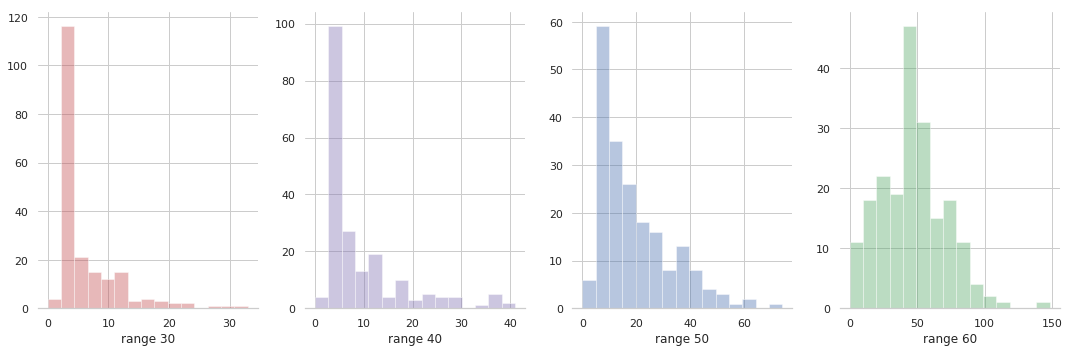

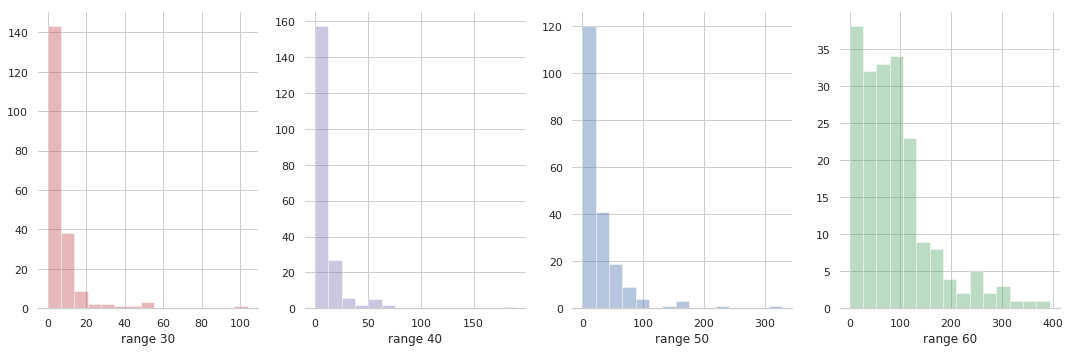

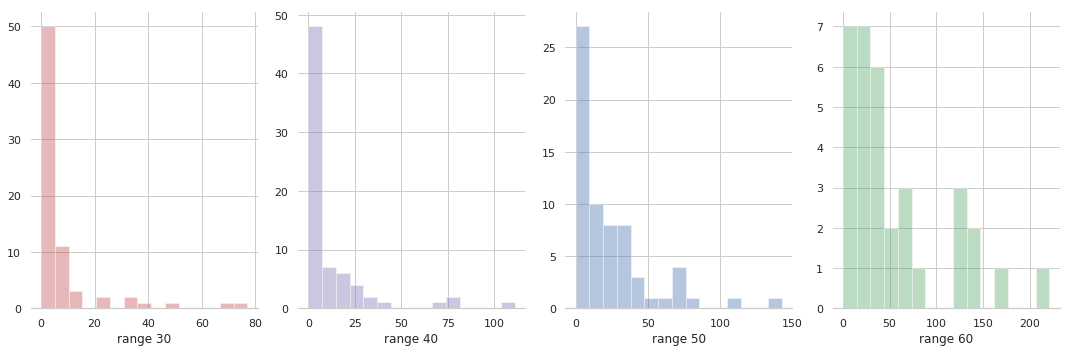

In [7]:
df_n100c10X100l03 = read_data('n100c10X100l03.csv') ;
df_n100c15X100l03 = read_data('n100c15X100l03.csv') ;
df_n100c20X100l03 = read_data('n100c20X100l03.csv') ;

histogram(df_n100c10X100l03)
histogram(df_n100c15X100l03)
histogram(df_n100c20X100l03)